# Regularisation

Many machine learning techniques include an option to fine-tune regularisation. Regularisation helps to avoid over-fitting of the moedl to the training set at the cost of accuracy of predicition for previously unseen samples in the test set. In the logistic regression method that we have bene looking at the regularisation term in the model fit is 'c'. The lower the c value the greater the regularisation. The previous code has been amended below to loop through a series of c values. For each value of c the model fit is run 100 times with different random train/test splits, and the average results are presented.

Note that as c increases (that is regularisation is reduced) the accuracy of fitting the training set increases until it reaches a plateau. With the test set of data, increasing c first improves accuracy but then, above a certain point, accuracy starts to drop. When the model is effectively un-regularised (very high c) we have ~95% accuracy in the test set. By fine-tuning c we can improve accuracy of the test set to ~98%.

c =  0.0001


/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars


c =  0.001
c =  0.01
c =  0.1
c =  1
c =  10
c =  100
c =  1000
c =  10000
            training_accuracy  test_accuracy           c
c                                                       
0.0001               0.934272       0.937063      0.0001
0.0010               0.946009       0.944056      0.0010
0.0100               0.969484       0.972028      0.0100
0.1000               0.985915       0.979021      0.1000
1.0000               0.988263       0.979021      1.0000
10.0000              0.990610       0.972028     10.0000
100.0000             0.992958       0.965035    100.0000
1000.0000            1.000000       0.958042   1000.0000
10000.0000           1.000000       0.951049  10000.0000


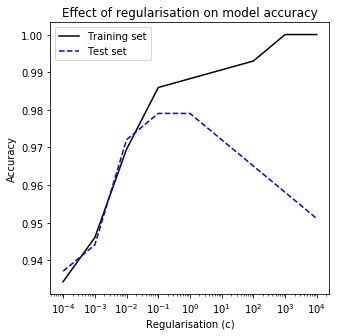

In [1]:
# import required modules

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def calculate_diagnostic_performance (actual_predicted):
    """ Calculate diagnostic performance.
    
    Takes a Numpy array of 1 and zero, two columns: actual and predicted
    
    Note that some statistics are repeats with different names
    (precision = positive_predictive_value and recall = sensitivity).
    Both names are returned
    
    Returns a dictionary of results:
        
    1) accuracy: proportion of test results that are correct    
    2) sensitivity: proportion of true +ve identified
    3) specificity: proportion of true -ve identified
    4) positive likelihood: increased probability of true +ve if test +ve
    5) negative likelihood: reduced probability of true +ve if test -ve
    6) false positive rate: proportion of false +ves in true -ve patients
    7) false negative rate:  proportion of false -ves in true +ve patients
    8) positive predictive value: chance of true +ve if test +ve
    9) negative predictive value: chance of true -ve if test -ve
    10) precision = positive predictive value 
    11) recall = sensitivity
    12) f1 = (2 * precision * recall) / (precision + recall)
    13) positive rate = rate of true +ve (not strictly a performance measure)
    """
    # Calculate results
    actual_positives = actual_predicted[:, 0] == 1
    actual_negatives = actual_predicted[:, 0] == 0
    test_positives = actual_predicted[:, 1] == 1
    test_negatives = actual_predicted[:, 1] == 0
    test_correct = actual_predicted[:, 0] == actual_predicted[:, 1]
    accuracy = np.average(test_correct)
    true_positives = actual_positives & test_positives
    true_negatives = actual_negatives & test_negatives
    sensitivity = np.sum(true_positives) / np.sum(actual_positives)
    specificity = np.sum(true_negatives) / np.sum(actual_negatives)
    positive_likelihood = sensitivity / (1 - specificity)
    negative_likelihood = (1 - sensitivity) / specificity
    false_positive_rate = 1 - specificity
    false_negative_rate = 1 - sensitivity
    positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
    negative_predictive_value = np.sum(true_negatives) / np.sum(test_negatives)
    precision = positive_predictive_value
    recall = sensitivity
    f1 = (2 * precision * recall) / (precision + recall)
    positive_rate = np.mean(actual_predicted[:,1])
    
    # Add results to dictionary
    performance = {}
    performance['accuracy'] = accuracy
    performance['sensitivity'] = sensitivity
    performance['specificity'] = specificity
    performance['positive_likelihood'] = positive_likelihood
    performance['negative_likelihood'] = negative_likelihood
    performance['false_positive_rate'] = false_positive_rate
    performance['false_negative_rate'] = false_negative_rate
    performance['positive_predictive_value'] = positive_predictive_value
    performance['negative_predictive_value'] = negative_predictive_value
    performance['precision'] = precision
    performance['recall'] = recall
    performance['f1'] = f1
    performance['positive_rate'] = positive_rate

    return performance

def chart_results(results):
    x = results['c']
    y1 = results['training_accuracy']
    y2 = results['test_accuracy']
    
    # Create figure
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.plot(x,y1, color='k',linestyle='solid', label = 'Training set')
    ax.plot(x,y2, color='b',linestyle='dashed', label = 'Test set')    
    ax.set_xscale('log')
    ax.set_xlabel('Regularisation (c)')
    ax.set_ylabel('Accuracy')
    plt.title('Effect of regularisation on model accuracy')
    plt.legend()
    plt.savefig('plot_26.png')
    plt.show()



def load_data ():
    """Load the data set. Here we load the Breast Cancer Wisconsin (Diagnostic)
    Data Set. Data could be loaded from other sources though the structure
    should be compatible with thi sdata set, that is an object with the 
    following attribtes:
        .data (holds feature data)
        .feature_names (holds feature titles)
        .target_names (holds outcome classification names)
        .target (holds classification as zero-based number)
        .DESCR (holds text-based description of data set)"""
    
    data_set = datasets.load_breast_cancer()
    return data_set

def normalise (X_train,X_test):
    """Normalise X data, so that training set has mean of zero and standard
    deviation of one"""
    
    # Initialise a new scaling object for normalising input data
    sc=StandardScaler() 
    # Set up the scaler just on the training set
    sc.fit(X_train)
    # Apply the scaler to the training and test sets
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    return X_train_std, X_test_std

def print_diagnostic_results (performance):
    """Iterate through, and print, the performance metrics dictionary"""
    
    print('\nMachine learning diagnostic performance measures:')
    print('-------------------------------------------------')
    for key, value in performance.items():
        print (key,'= %0.3f' %value) # print 3 decimal places
    return

def split_data (data_set, split=0.25):
    """Extract X and y data from data_set object, and split into tarining and
    test data. Split defaults to 75% training, 25% test if not other value 
    passed to function"""
    
    X=data_set.data
    y=data_set.target
    X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=split)
    return X_train,X_test,y_train,y_test

def test_model(model, X, y):
    """Return predicted y given X (attributes)"""
    
    y_pred = model.predict(X)
    test_results = np.vstack((y, y_pred)).T
    return test_results

def train_model (X, y, c):
    """Train the model """
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(C=c)
    model.fit(X, y)
    return model

###### Main code #######

# Load data
data_set = load_data()



# List of regularisation values
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
training_accuracy = []
test_accuracy = []
c_results = [] # record c

for c in c_list:
    # observe progress
    print('c = ',c)
    
    for i in range(1000):
        
        # Split data into trainign and test sets
        X_train,X_test,y_train,y_test = split_data(data_set, 0.25)

        # Normalise data
        X_train_std, X_test_std = normalise(X_train,X_test)
        # Repeat test 1000x per level of c
        c_results.append(c)
        
        # Train model
        model = train_model(X_train_std,y_train, c)

        # Produce results for training set
        test_results = test_model(model, X_train_std, y_train)
        performance = calculate_diagnostic_performance(test_results)
        training_accuracy.append(performance['accuracy'])

        # Produce results for test set
        test_results = test_model(model, X_test_std, y_test)
        performance = calculate_diagnostic_performance(test_results)
        test_accuracy.append(performance['accuracy'])

results = pd.DataFrame()
results['c'] = c_results
results['training_accuracy'] = training_accuracy
results['test_accuracy'] = test_accuracy
summary = results.groupby('c').median()
summary['c'] = list(summary.index)

print ()
print (summary)
chart_results (summary)
